In [46]:
# Import dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [47]:
# Create set of random latitude and longitude combinations
lats = np.random.uniform(low = -90.000, high = 90.000, size = 1500)
lngs = np.random.uniform(low = -180.000, high = 180.000, size = 1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [48]:
# Add latitudes and longitudes to list
coordinates = list(lat_lngs)

In [49]:
# Use citipy module to determine city based on latitude and longitude
from citipy import citipy

In [50]:
# Create list for holding cities
cities = []

# Identify nearest city for each latitude and longitude combination
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    
    # If city is unique, add it to cities list
    if city not in cities:
        cities.append(city)

# Print city count to confirm sufficient count
len(cities)

608

In [51]:
# Import requests library
import requests

# Import API key
from config import weather_api_key

In [52]:
# Starting URL for OpenWeatherMap API call
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=" + weather_api_key

In [53]:
# Import time library and datetime module from datetime library
import time
from datetime import datetime

In [54]:
# Create empty list to hold weather data
city_data = []

# Print beginning of logging
print("Beginning Data Retrieval")
print("--------------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all cities in list
for i, city in enumerate(cities):
    
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)
    
    # Create endpoint URL with each city
    city_url = url + "&q=" + city.replace(" ", "+")
    
    # Log URL, record, and set numbers and city
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    
    # Add 1 to record count
    record_count += 1
    
    # Run API request for each city
    try:
        
        # Parse JSON and retrieve data
        city_weather = requests.get(city_url).json()
        
        # Parse out needed data
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        
        # Convert date to ISO standard
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime("%Y-%m-%d %H:%M:%S")
        
        # Append city information into city_data list
        city_data.append({
            "City": city.title(),
            "Lat": city_lat,
            "Lng": city_lng,
            "Max Temp": city_max_temp,
            "Humidity": city_humidity,
            "Cloudiness": city_clouds,
            "Wind Speed": city_wind,
            "Country": city_country,
            "Date": city_date})
    
    # If an error is experienced, skip city
    except:
        print("City not found. Skipping...")
        pass
    
# Indicate data loading is complete
print("--------------------------------")
print("Data Retrieval Complete")
print("--------------------------------")

Beginning Data Retrieval
--------------------------------
Processing Record 1 of Set 1 | ahipara
Processing Record 2 of Set 1 | saint-philippe
Processing Record 3 of Set 1 | busselton
Processing Record 4 of Set 1 | hilo
Processing Record 5 of Set 1 | puerto ayora
Processing Record 6 of Set 1 | lavrentiya
Processing Record 7 of Set 1 | brae
Processing Record 8 of Set 1 | saskylakh
Processing Record 9 of Set 1 | lebu
Processing Record 10 of Set 1 | thompson
Processing Record 11 of Set 1 | cidreira
Processing Record 12 of Set 1 | boddam
Processing Record 13 of Set 1 | warqla
City not found. Skipping...
Processing Record 14 of Set 1 | cherskiy
Processing Record 15 of Set 1 | obihiro
Processing Record 16 of Set 1 | karamken
City not found. Skipping...
Processing Record 17 of Set 1 | carauari
Processing Record 18 of Set 1 | qinhuangdao
Processing Record 19 of Set 1 | torbay
Processing Record 20 of Set 1 | bengkulu
Processing Record 21 of Set 1 | amderma
City not found. Skipping...
Processing

Processing Record 39 of Set 4 | faanui
Processing Record 40 of Set 4 | port macquarie
Processing Record 41 of Set 4 | boa vista
Processing Record 42 of Set 4 | synya
Processing Record 43 of Set 4 | umzimvubu
City not found. Skipping...
Processing Record 44 of Set 4 | young
Processing Record 45 of Set 4 | bethel
Processing Record 46 of Set 4 | nikolskoye
Processing Record 47 of Set 4 | leningradskiy
Processing Record 48 of Set 4 | nampa
Processing Record 49 of Set 4 | severo-kurilsk
Processing Record 50 of Set 4 | sentyabrskiy
City not found. Skipping...
Processing Record 1 of Set 5 | alamosa
Processing Record 2 of Set 5 | svetlyy
Processing Record 3 of Set 5 | prince rupert
Processing Record 4 of Set 5 | pevek
Processing Record 5 of Set 5 | upernavik
Processing Record 6 of Set 5 | portland
Processing Record 7 of Set 5 | half moon bay
Processing Record 8 of Set 5 | almeirim
Processing Record 9 of Set 5 | alekseyevskaya
Processing Record 10 of Set 5 | harper
Processing Record 11 of Set 5

Processing Record 30 of Set 8 | marondera
Processing Record 31 of Set 8 | quirinopolis
Processing Record 32 of Set 8 | la tuque
Processing Record 33 of Set 8 | dudinka
Processing Record 34 of Set 8 | vostok
Processing Record 35 of Set 8 | saint-pierre
Processing Record 36 of Set 8 | wahran
City not found. Skipping...
Processing Record 37 of Set 8 | baykit
Processing Record 38 of Set 8 | praia da vitoria
Processing Record 39 of Set 8 | rocha
Processing Record 40 of Set 8 | lata
Processing Record 41 of Set 8 | westport
Processing Record 42 of Set 8 | huarmey
Processing Record 43 of Set 8 | auki
Processing Record 44 of Set 8 | acapulco
Processing Record 45 of Set 8 | mora
Processing Record 46 of Set 8 | gat
Processing Record 47 of Set 8 | srednekolymsk
Processing Record 48 of Set 8 | kijang
Processing Record 49 of Set 8 | dwarka
Processing Record 50 of Set 8 | alta floresta
Processing Record 1 of Set 9 | sovetskiy
Processing Record 2 of Set 9 | isangel
Processing Record 3 of Set 9 | cruze

Processing Record 17 of Set 12 | chitungwiza
Processing Record 18 of Set 12 | oyama
Processing Record 19 of Set 12 | vydrino
Processing Record 20 of Set 12 | pontes e lacerda
Processing Record 21 of Set 12 | nadym
Processing Record 22 of Set 12 | port said
Processing Record 23 of Set 12 | inhambane
Processing Record 24 of Set 12 | hovd
Processing Record 25 of Set 12 | buckeye
Processing Record 26 of Set 12 | kandi
Processing Record 27 of Set 12 | vokhma
Processing Record 28 of Set 12 | callaway
Processing Record 29 of Set 12 | nautla
Processing Record 30 of Set 12 | naryan-mar
Processing Record 31 of Set 12 | petropavlovsk-kamchatskiy
Processing Record 32 of Set 12 | misawa
Processing Record 33 of Set 12 | sao miguel do araguaia
Processing Record 34 of Set 12 | praia
Processing Record 35 of Set 12 | along
Processing Record 36 of Set 12 | concarneau
Processing Record 37 of Set 12 | rock sound
Processing Record 38 of Set 12 | talnakh
Processing Record 39 of Set 12 | waipawa
Processing Re

In [55]:
# Tally number of cities in city_data
print(len(city_data))

565


In [56]:
# Convert array of dictionaries to Pandas DF
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Ahipara,-35.1667,173.1667,63.18,90,29,6.69,NZ,2022-03-10 19:12:38
1,Saint-Philippe,-21.3585,55.7679,80.19,85,39,9.17,RE,2022-03-10 19:12:39
2,Busselton,-33.6500,115.3333,73.51,48,89,10.85,AU,2022-03-10 19:12:39
3,Hilo,19.7297,-155.0900,79.61,69,0,5.99,US,2022-03-10 19:12:40
4,Puerto Ayora,-0.7393,-90.3518,85.96,86,52,5.01,EC,2022-03-10 19:12:40
5,Lavrentiya,65.5833,-171.0000,2.52,70,0,14.09,RU,2022-03-10 19:12:40
6,Brae,60.3964,-1.3530,46.42,88,62,28.39,GB,2022-03-10 19:12:41
7,Saskylakh,71.9167,114.0833,-34.02,100,94,3.74,RU,2022-03-10 19:12:41
8,Lebu,-37.6167,-73.6500,61.21,72,22,22.44,CL,2022-03-10 19:12:42
9,Thompson,55.7435,-97.8558,8.65,75,100,5.84,CA,2022-03-10 19:12:42


In [57]:
# Reorder columns
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Ahipara,NZ,2022-03-10 19:12:38,-35.1667,173.1667,63.18,90,29,6.69
1,Saint-Philippe,RE,2022-03-10 19:12:39,-21.3585,55.7679,80.19,85,39,9.17
2,Busselton,AU,2022-03-10 19:12:39,-33.6500,115.3333,73.51,48,89,10.85
3,Hilo,US,2022-03-10 19:12:40,19.7297,-155.0900,79.61,69,0,5.99
4,Puerto Ayora,EC,2022-03-10 19:12:40,-0.7393,-90.3518,85.96,86,52,5.01


In [58]:
# Create output CSV file
output_data_file = "Weather_Data/cities.csv"

# Export DF into CSV
city_data_df.to_csv(output_data_file, index_label = "City_ID")

In [59]:
# Extract relevant fields from DF for plotting
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

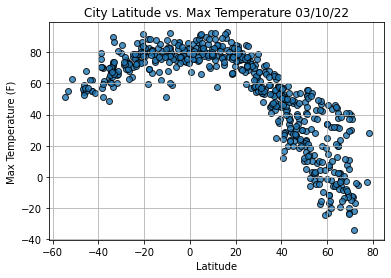

In [84]:
# Build scatter plot for latitude vs. max temp
plt.scatter(lats, max_temps, edgecolor = "black", linewidths = 1, marker = "o", alpha = 0.8, label = "Cities")

# Add other graph formatting
plt.title(f"City Latitude vs. Max Temperature " + time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save figure
plt.savefig("Weather_Data/Fig1.png")

# Show plot
plt.show()

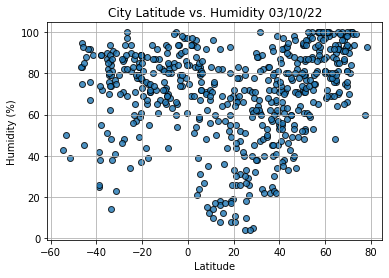

In [61]:
# Build scatter plot for latitude vs. humidity
plt.scatter(lats, humidity, edgecolor = "black", linewidths = 1, marker = "o", alpha = 0.8, label = "Cities")

# Add other graph formatting
plt.title(f"City Latitude vs. Humidity " + time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save figure
plt.savefig("Weather_Data/Fig2.png")

# Show plot
plt.show()

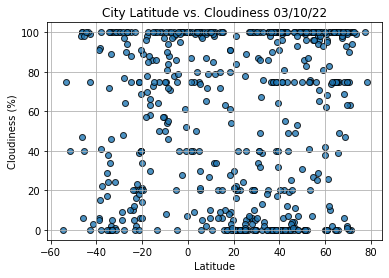

In [62]:
# Build scatter plot for latitude vs. cloudiness
plt.scatter(lats, cloudiness, edgecolor = "black", linewidths = 1, marker = "o", alpha = 0.8, label = "Cities")

# Add other graph formatting
plt.title(f"City Latitude vs. Cloudiness " + time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save figure
plt.savefig("Weather_Data/Fig3.png")

# Show plot
plt.show()

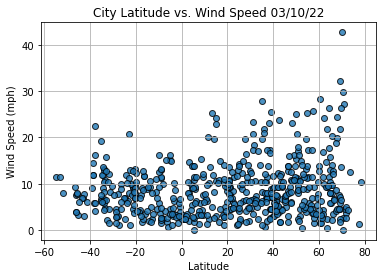

In [63]:
# Build scatter plot for latitude vs. wind speed
plt.scatter(lats, wind_speed, edgecolor = "black", linewidths = 1, marker = "o", alpha = 0.8, label = "Cities")

# Add other graph formatting
plt.title(f"City Latitude vs. Wind Speed " + time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save figure
plt.savefig("Weather_Data/Fig4.png")

# Show plot
plt.show()

In [64]:
# Import linregress
from scipy.stats import linregress

In [65]:
# Create function to perform linear regression on weather data and plot regression line and equation with data
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
    
    # Run regression in hemisphere weather data
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
    
    # Calculate regression line y values from slope and intercept
    regress_values = x_values * slope + intercept
    
    # Get equation of line
    line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))
    
    # Create scapper plot and plot regression line
    plt.scatter(x_values, y_values)
    plt.plot(x_values, regress_values, "r")
    
    # Annotate text for line equation
    plt.annotate(line_eq, text_coordinates, fontsize = 15, color = "red")
    plt.title(title)
    plt.xlabel("Latitude")
    plt.ylabel(y_label)
    plt.show()

In [66]:
index13 = city_data_df.loc[13]
index13

City                      Obihiro
Country                        JP
Date          2022-03-10 19:12:44
Lat                       42.9172
Lng                      143.2044
Max Temp                    19.71
Humidity                       93
Cloudiness                    100
Wind Speed                   1.81
Name: 13, dtype: object

In [67]:
# Create northen and southern hemisphere DFs
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] <= 0)]

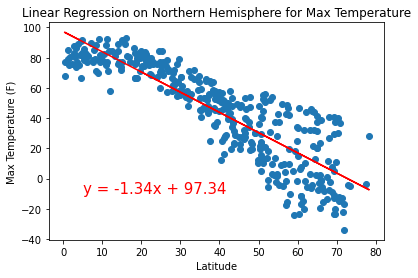

In [68]:
# Linear regression on northern hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]

# Call function
plot_linear_regression(x_values, y_values, "Linear Regression on Northern Hemisphere for Max Temperature", "Max Temperature (F)", (5, -10))

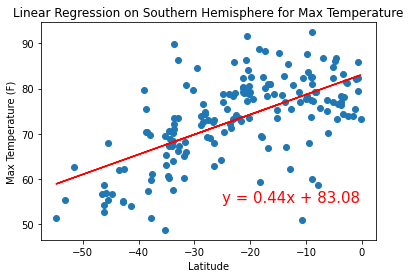

In [70]:
# Linear regression on southern hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]

# Call function
plot_linear_regression(x_values, y_values, "Linear Regression on Southern Hemisphere for Max Temperature", "Max Temperature (F)", (-25, 55))

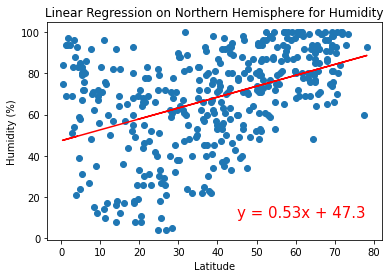

In [71]:
# Linear regression on northern hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]

# Call function
plot_linear_regression(x_values, y_values, "Linear Regression on Northern Hemisphere for Humidity", "Humidity (%)", (45, 10))

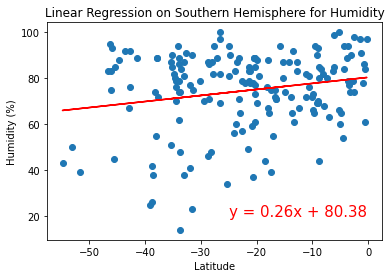

In [73]:
# Linear regression on southern hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]

# Call function
plot_linear_regression(x_values, y_values, "Linear Regression on Southern Hemisphere for Humidity", "Humidity (%)", (-25, 20))

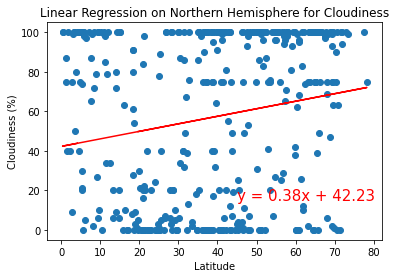

In [75]:
# Linear regression on northern hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]

# Call function
plot_linear_regression(x_values, y_values, "Linear Regression on Northern Hemisphere for Cloudiness", "Cloudiness (%)", (45, 15))

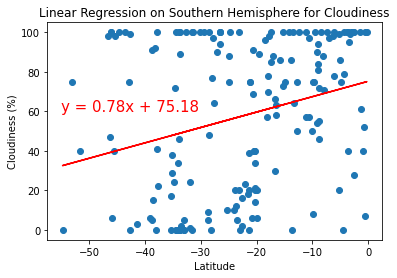

In [78]:
# Linear regression on southern hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]

# Call function
plot_linear_regression(x_values, y_values, "Linear Regression on Southern Hemisphere for Cloudiness", "Cloudiness (%)", (-55, 60))

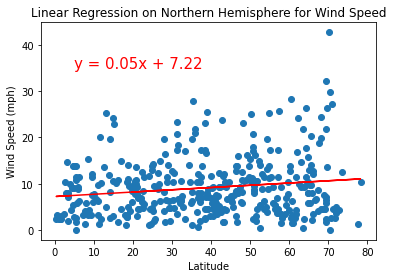

In [81]:
# Linear regression on northern hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]

# Call function
plot_linear_regression(x_values, y_values, "Linear Regression on Northern Hemisphere for Wind Speed", "Wind Speed (mph)", (5, 35))

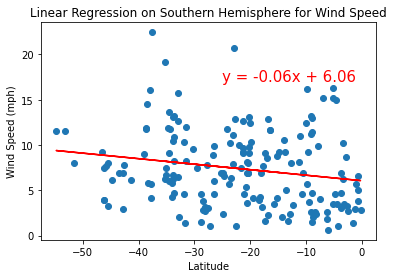

In [82]:
# Linear regression on southern hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]

# Call function
plot_linear_regression(x_values, y_values, "Linear Regression on Southern Hemisphere for Wind Speed", "Wind Speed (mph)", (-25, 17))